_**Note: This is a supporting notebook where we did some Data Exploration for our project**_

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [5]:
#Airbnb listing data
listings_LA = pd.read_csv('listings_LA.csv')
listing_AUS = pd.read_csv('listings_AUS.csv')
listings_NYC = pd.read_csv('listings_NYC.csv')

#Airbnb review data
reviews_LA = pd.read_csv('reviews_LA.csv')
reviews_AUS = pd.read_csv('reviews_AUS.csv')
reviews_NYC = pd.read_csv('reviews_NYC.csv')

In [7]:
print(listings_LA.shape)
print(listing_AUS.shape)
print(listings_NYC.shape)

print(reviews_LA.shape)
print(reviews_AUS.shape)
print(reviews_NYC.shape)

(45031, 79)
(15431, 79)
(37784, 75)
(1673605, 2)
(660975, 2)
(970919, 2)


In [9]:
print(listings_LA.columns)
print(reviews_LA.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [10]:
listings_LA.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,75212,https://www.airbnb.com/rooms/75212,20250301213405,2025-03-03,city scrape,Sunny Room only in town house nr Long Beach…,"A bright & sunny room ONLY with full size bed,...","A really lovely area, with so many restaurants...",https://a0.muscache.com/pictures/e3cff12f-d518...,343761,...,4.96,4.89,4.83,NaN,f,1,0,1,0,0.46
1,76561,https://www.airbnb.com/rooms/76561,20250301213405,2025-03-03,city scrape,420 Friendly Sweet Lil' Guesthouse by Sofi & LAX,-420 Friendly Airbnb Stay in LA!-<br />(16 to ...,Q: WHAT'S THE NEIGHBORHOOD LIKE?<br /><br />A:...,https://a0.muscache.com/pictures/23627d22-d977...,403838,...,4.94,4.70,4.79,NaN,f,4,4,0,0,5.30
2,79502,https://www.airbnb.com/rooms/79502,20250301213405,2025-03-03,city scrape,Silver Lake million dollar view * luxe patio,"Walk to Sunset Junction, the Polka Dot triangl...",We have the absolute iconic views of downtown...,https://a0.muscache.com/pictures/miso/Hosting-...,428171,...,4.88,4.94,4.73,NaN,f,2,2,0,0,1.78
3,79832,https://www.airbnb.com/rooms/79832,20250301213405,2025-03-02,city scrape,Guest Quarters @ the Hollywood Sign,Guest House,NaN,https://a0.muscache.com/pictures/541078/35c6dc...,28569,...,4.95,4.93,4.91,HSR19-002716,f,1,1,0,0,2.84
4,80714,https://www.airbnb.com/rooms/80714,20250301213405,2025-03-03,city scrape,Cozy secluded Guesthouse in Garden,Sierra Bonita Guesthouse in Garden setting:<br...,We are very central to so many tourist destina...,https://a0.muscache.com/pictures/2080263/2d8a6...,436647,...,4.98,4.95,4.88,HSR19-003488,f,1,1,0,0,1.16


## Data Cleaning

Creating the City and State variables and Filtering Date 

- Cities covered: Los Angeles-CA, Austin-TX, New York City-NY

- Working on a 1-year timeframe from **2024-01-01** to **2024-12-31**

Removing the $ dollar infront of the price variable to use it as numeric

Reducing the property types fields into more encompassing categories:
- Apartment,Condo, Farm, Hous, Huge Space, Outside/Nature, Rustic House, Small House, Townhouse, Vacation House,
  Vehicle/Moving Place, Villa, Hostel/Hotel

In [19]:
%%capture
#creating city variable
listings_LA['City'] = 'Los Angeles'
listing_AUS['City'] = 'Austin'
listings_NYC['City'] = 'New York City'

#creating state variable
listings_LA['State'] = 'California'
listing_AUS['State'] = 'Texas'
listings_NYC['State'] = 'New York'

#filtering reviews date range
reviews_LA = reviews_LA[(reviews_LA['date'] >= '2024-01-01') & (reviews_LA['date'] <= '2024-12-31')]
reviews_AUS = reviews_AUS[(reviews_AUS['date'] >= '2024-01-01') & (reviews_AUS['date'] <= '2024-12-31')]
reviews_NYC = reviews_NYC[(reviews_NYC['date'] >= '2024-01-01') & (reviews_NYC['date'] <= '2024-12-31')]


#listing_AUS['price'], include $, need to remove to treat as numeric
listings_NYC['price'] = pd.to_numeric(listings_NYC['price'].str.replace('[\$,]', '', regex=True), errors='coerce')
listings_LA['price'] = pd.to_numeric(listings_LA['price'].str.replace('[\$,]', '', regex=True), errors='coerce')
listing_AUS['price'] = pd.to_numeric(listing_AUS['price'].str.replace('[\$,]', '', regex=True), errors='coerce')

# Creating the mapping dictionary 
type_mapping = {
    "Barn": "Farm", "Boat": "Vehicle", "Bus": "Vehicle", "Camper/RV": "Vehicle",
    "Campsite": "Outside Nature", "Casa particular": "Small House", "Castle": "Huge Space",
    "Cave": "Outside Nature", "Dome": "Outside Nature", "Earthen home": "Rustic House",
    "Entire bed and breakfast": "House", "Entire bungalow": "Small House",
    "Entire cabin": "Vacation House", "Entire chalet": "Vacation House", "Entire condo": "Condo",
    "Entire cottage": "Vacation House", "Entire guest suite": "House", "Entire guesthouse": "House",
    "Entire home": "House", "Entire home/apt": "Apartment", "Entire loft": "Apartment",
    "Entire place": "House", "Entire rental unit": "House", "Entire resort": "Huge Space",
    "Entire serviced apartment": "Apartment", "Entire townhouse": "Townhouse",
    "Entire vacation home": "Rustic House", "Entire villa": "Villa", "Farm stay": "Farm",
    "Floor": "House", "Houseboat": "Vehicle", "Hut": "Rustic House", "Island": "Huge Space",
    "Lighthouse": "Small House", "Minsu": "Rustic House", "Private room": "House",
    "Private room in barn": "Farm", "Private room in bed and breakfast": "House",
    "Private room in bungalow": "Small House", "Private room in cabin": "Vacation House",
    "Private room in camper/rv": "Vehicle", "Private room in casa particular": "Small House",
    "Private room in castle": "Huge Space", "Private room in cave": "Outside Nature",
    "Private room in condo": "Condo", "Private room in cottage": "Vacation House",
    "Private room in dome": "Outside Nature", "Private room in earthen home": "Rustic House",
    "Private room in farm stay": "Farm", "Private room in floor": "House",
    "Private room in guest suite": "House", "Private room in guesthouse": "House",
    "Private room in home": "House", "Private room in hostel": "Hostel/Hotel",
    "Private room in houseboat": "Vehicle", "Private room in in-law": "House",
    "Private room in kezhan": "House", "Private room in lighthouse": "Small House",
    "Private room in loft": "Apartment", "Private room in minsu": "Rustic House",
    "Private room in nature lodge": "Outside Nature", "Private room in ranch": "Farm",
    "Private room in religious building": "Apartment", "Private room in rental unit": "House",
    "Private room in resort": "Huge Space", "Private room in serviced apartment": "Apartment",
    "Private room in tent": "Outside Nature", "Private room in tiny home": "Small House",
    "Private room in tower": "Huge Space", "Private room in townhouse": "Townhouse",
    "Private room in train": "Vehicle", "Private room in treehouse": "Outside Nature",
    "Private room in vacation home": "Vacation House", "Private room in villa": "Villa",
    "Private room in yurt": "Outside Nature", "Ranch": "Farm", "Room in aparthotel": "Hostel/Hotel",
    "Room in bed and breakfast": "House", "Room in boutique hotel": "Hostel/Hotel",
    "Room in hostel": "Hostel/Hotel", "Room in hotel": "Hostel/Hotel", "Room in resort": "Huge Space",
    "Room in serviced apartment": "Apartment", "Shared room": "House",
    "Shared room in boutique hotel": "Hostel/Hotel", "Shared room in bungalow": "Small House",
    "Shared room in cabin": "Vacation House", "Shared room in camper/rv": "Vehicle",
    "Shared room in casa particular": "Small House", "Shared room in condo": "Condo",
    "Shared room in earthen home": "Rustic House", "Shared room in guest suite": "House",
    "Shared room in guesthouse": "House", "Shared room in home": "House",
    "Shared room in hostel": "Hostel/Hotel", "Shared room in hotel": "Hostel/Hotel",
    "Shared room in loft": "Apartment", "Shared room in rental unit": "House",
    "Shared room in serviced apartment": "Apartment", "Shared room in townhouse": "Townhouse",
    "Shared room in villa": "Villa", "Shepherd’s hut": "Vacation House",
    "Shipping container": "Vehicle/Moving Place", "Tent": "Outside Nature",
    "Tiny home": "Small House", "Tipi": "Outside Nature", "Tower": "Huge Space",
    "Train": "Vehicle", "Treehouse": "Outside Nature", "Yurt": "Outside Nature"
}

#creating new property type column
listings_NYC['property_group_type'] = listings_NYC['property_type'].map(type_mapping)
listings_LA['property_group_type'] = listings_LA['property_type'].map(type_mapping)
listing_AUS['property_group_type'] = listing_AUS['property_type'].map(type_mapping)

#droping the original
listings_NYC = listings_NYC.drop(columns = ['property_type'])
listings_LA = listings_LA.drop(columns = ['property_type'])
listing_AUS = listing_AUS.drop(columns = ['property_type'])

#Removing % from rate columns
listings_NYC['host_response_rate'] = listings_NYC['host_response_rate'].astype(str).str.replace('%', '').replace('nan', np.nan).astype(float) / 100
listings_NYC['host_acceptance_rate'] = listings_NYC['host_acceptance_rate'].astype(str).str.replace('%', '').replace('nan', np.nan).astype(float) / 100
listings_LA['host_response_rate'] = listings_LA['host_response_rate'].astype(str).str.replace('%', '').replace('nan', np.nan).astype(float) / 100
listings_LA['host_acceptance_rate'] = listings_LA['host_acceptance_rate'].astype(str).str.replace('%', '').replace('nan', np.nan).astype(float) / 100    
listing_AUS['host_response_rate'] = listing_AUS['host_response_rate'].astype(str).str.replace('%', '').replace('nan', np.nan).astype(float) / 100
listing_AUS['host_acceptance_rate'] = listing_AUS['host_acceptance_rate'].astype(str).str.replace('%', '').replace('nan', np.nan).astype(float) / 100    

_**Note: This is our inital Occupancy_Rate calculation, for the final version we changed it as described in the final report**_ 

**Creating the Target variable: Occupancy_Rate**

Our target variable, **occupancy_rate**, is designed to quantify how often a listing is booked over the course of a year. This Occupancy Rate comes from Inside Airbnb (the source we collected our data from). Link: https://insideairbnb.com/data-assumptions/

To calculate this we group the data by listing and counting the number of reviews received during the year. This count is then divided by 365, which gives us an average daily booking rate. For example, if a listing receives 73 reviews in a year, its occupancy_rate would be 73/365 ≈ 0.20, meaning it is booked roughly 20% of the days in a year.

By using the occupancy_rate as our target column, we can build a model that predicts the likelihood of a listing being booked on any given day, which is crucial for our profit maximization algorithm. This metric not only provides a clear indication of a listing’s performance but also serves as a foundation for optimizing pricing strategies across different cities.

In [20]:
#removing duplicate reviews for the same date
reviews_LA = reviews_LA.drop_duplicates(subset=['listing_id', 'date'])
reviews_AUS = reviews_AUS.drop_duplicates(subset=['listing_id', 'date'])
reviews_NYC = reviews_NYC.drop_duplicates(subset=['listing_id', 'date'])

#Creating occupancy_rate by grouping listings and counting the reviews per year to obtain the average daily rate
reviews_LA['Occupancy_Rate'] = reviews_LA.groupby('listing_id')['listing_id'].transform('count') / 366
reviews_AUS['Occupancy_Rate'] = reviews_AUS.groupby('listing_id')['listing_id'].transform('count') / 366
reviews_NYC['Occupancy_Rate'] = reviews_NYC.groupby('listing_id')['listing_id'].transform('count') / 366

#removing duplicates
reviews_LA = reviews_LA.drop_duplicates(subset=['listing_id'])
reviews_AUS = reviews_AUS.drop_duplicates(subset=['listing_id'])
reviews_NYC = reviews_NYC.drop_duplicates(subset=['listing_id'])

#reducing df to be just listing id and occupancy rate
reviews_LA = reviews_LA[['listing_id', 'Occupancy_Rate']]
reviews_AUS = reviews_AUS[['listing_id', 'Occupancy_Rate']]
reviews_NYC = reviews_NYC[['listing_id', 'Occupancy_Rate']]

#merging with listings data
listings_LA = listings_LA.merge(reviews_LA, left_on='id', right_on='listing_id', how='left')
listing_AUS = listing_AUS.merge(reviews_AUS, left_on='id', right_on='listing_id', how='left')
listings_NYC = listings_NYC.merge(reviews_NYC, left_on='id', right_on='listing_id', how='left')

#droping listing_id from listing data
listings_LA = listings_LA.drop(columns=['listing_id'])
listing_AUS = listing_AUS.drop(columns=['listing_id'])
listings_NYC = listings_NYC.drop(columns=['listing_id'])

#any occupancy set at NaN set to 0
listings_LA['Occupancy_Rate'] = listings_LA['Occupancy_Rate'].fillna(0)
listing_AUS['Occupancy_Rate'] = listing_AUS['Occupancy_Rate'].fillna(0)
listings_NYC['Occupancy_Rate'] = listings_NYC['Occupancy_Rate'].fillna(0)

**Merging Data Together**

In [21]:
listings = pd.concat([listings_NYC, listings_LA, listing_AUS], ignore_index=True)

## Data Exploration

### Airbnb Superhost and Acceptance Rate Across Cities

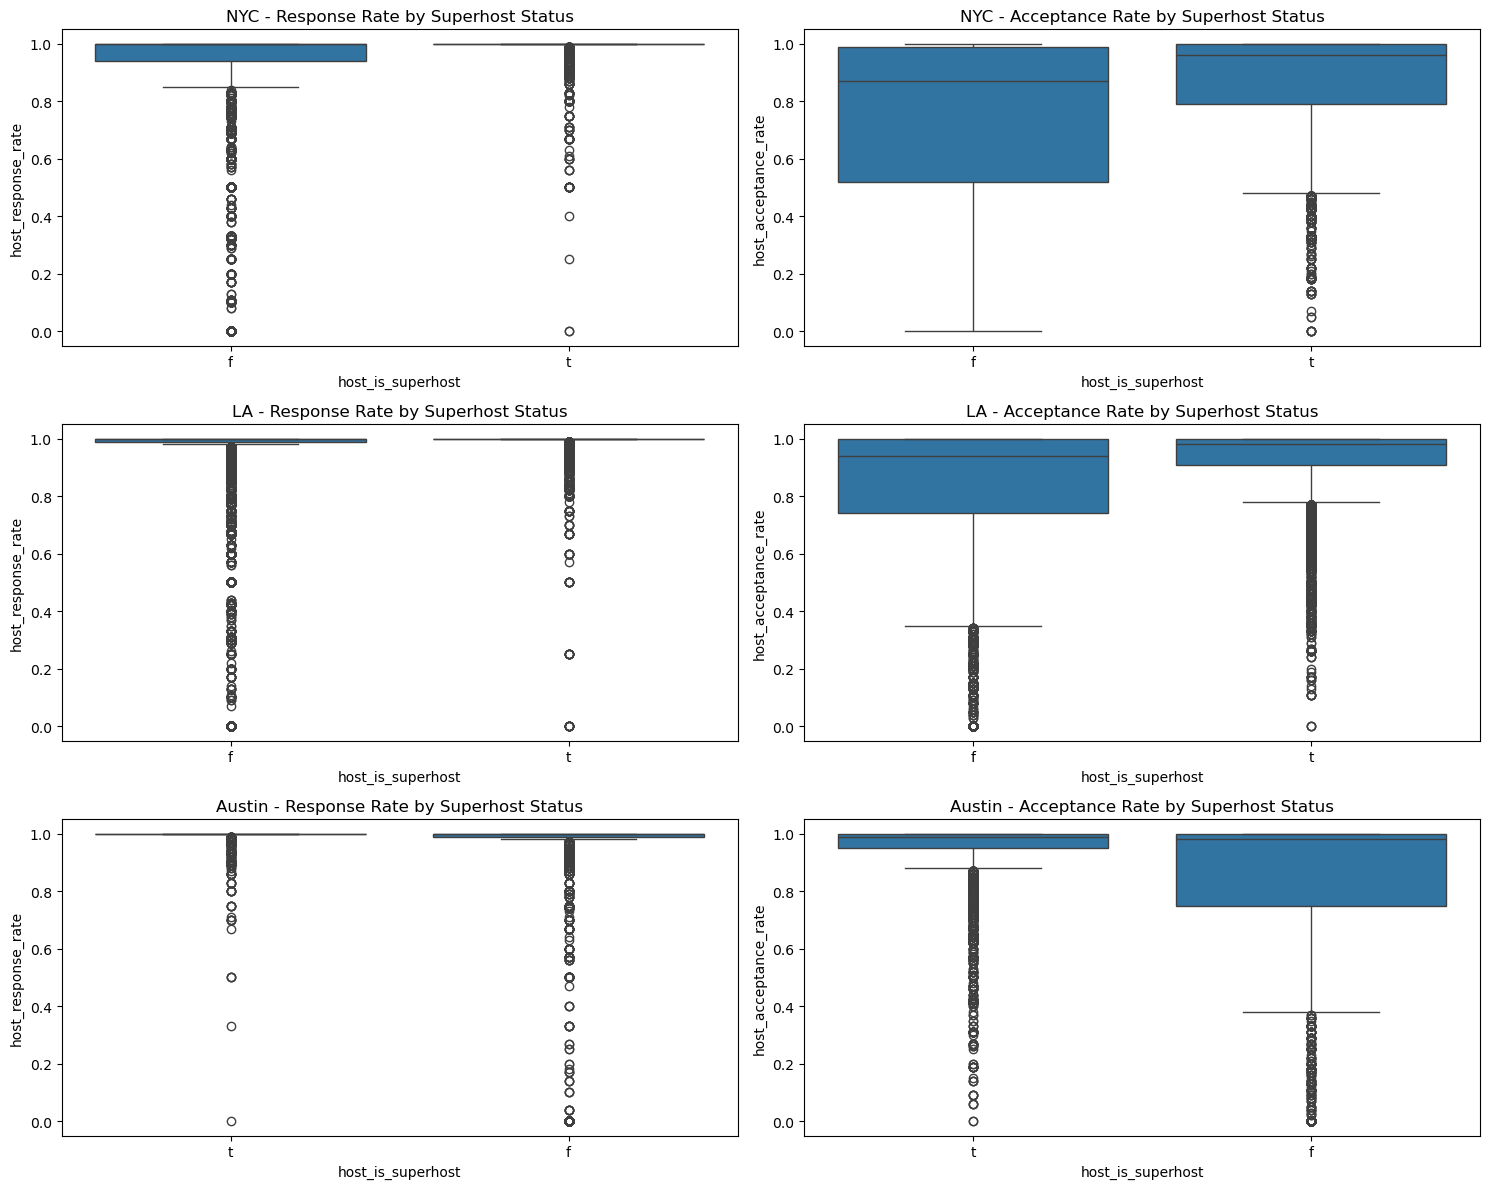

In [22]:
# Set up the figure
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Define cities and datasets
cities = ['NYC', 'LA', 'Austin']
datasets = [listings_NYC, listings_LA, listing_AUS]

# Create boxplots for each city
for i, (city, data) in enumerate(zip(cities, datasets)):
    # Response Rate boxplot
    sns.boxplot(
        x='host_is_superhost',
        y='host_response_rate',
        data=data,
        ax=axes[i, 0]
    )
    axes[i, 0].set_title(f'{city} - Response Rate by Superhost Status')

    # Acceptance Rate boxplot
    sns.boxplot(
        x='host_is_superhost',
        y='host_acceptance_rate',
        data=data,
        ax=axes[i, 1]
    )
    axes[i, 1].set_title(f'{city} - Acceptance Rate by Superhost Status')

plt.tight_layout()
plt.show()

- Response Rate (left column): Across all three cities, there is minimal difference in response rates between superhosts and non-superhosts. Most hosts, regardless of status, show near-perfect response rates with only a few outliers.

- Acceptance Rate (right column): In contrast, acceptance rates vary more noticeably by superhost status. Superhosts generally have higher and more consistent acceptance rates, while non-superhosts display a wider range with more low-end outliers—especially in NYC and LA.

### Airbnb Superhost Distribution and Response Rate Frequency Across Cities

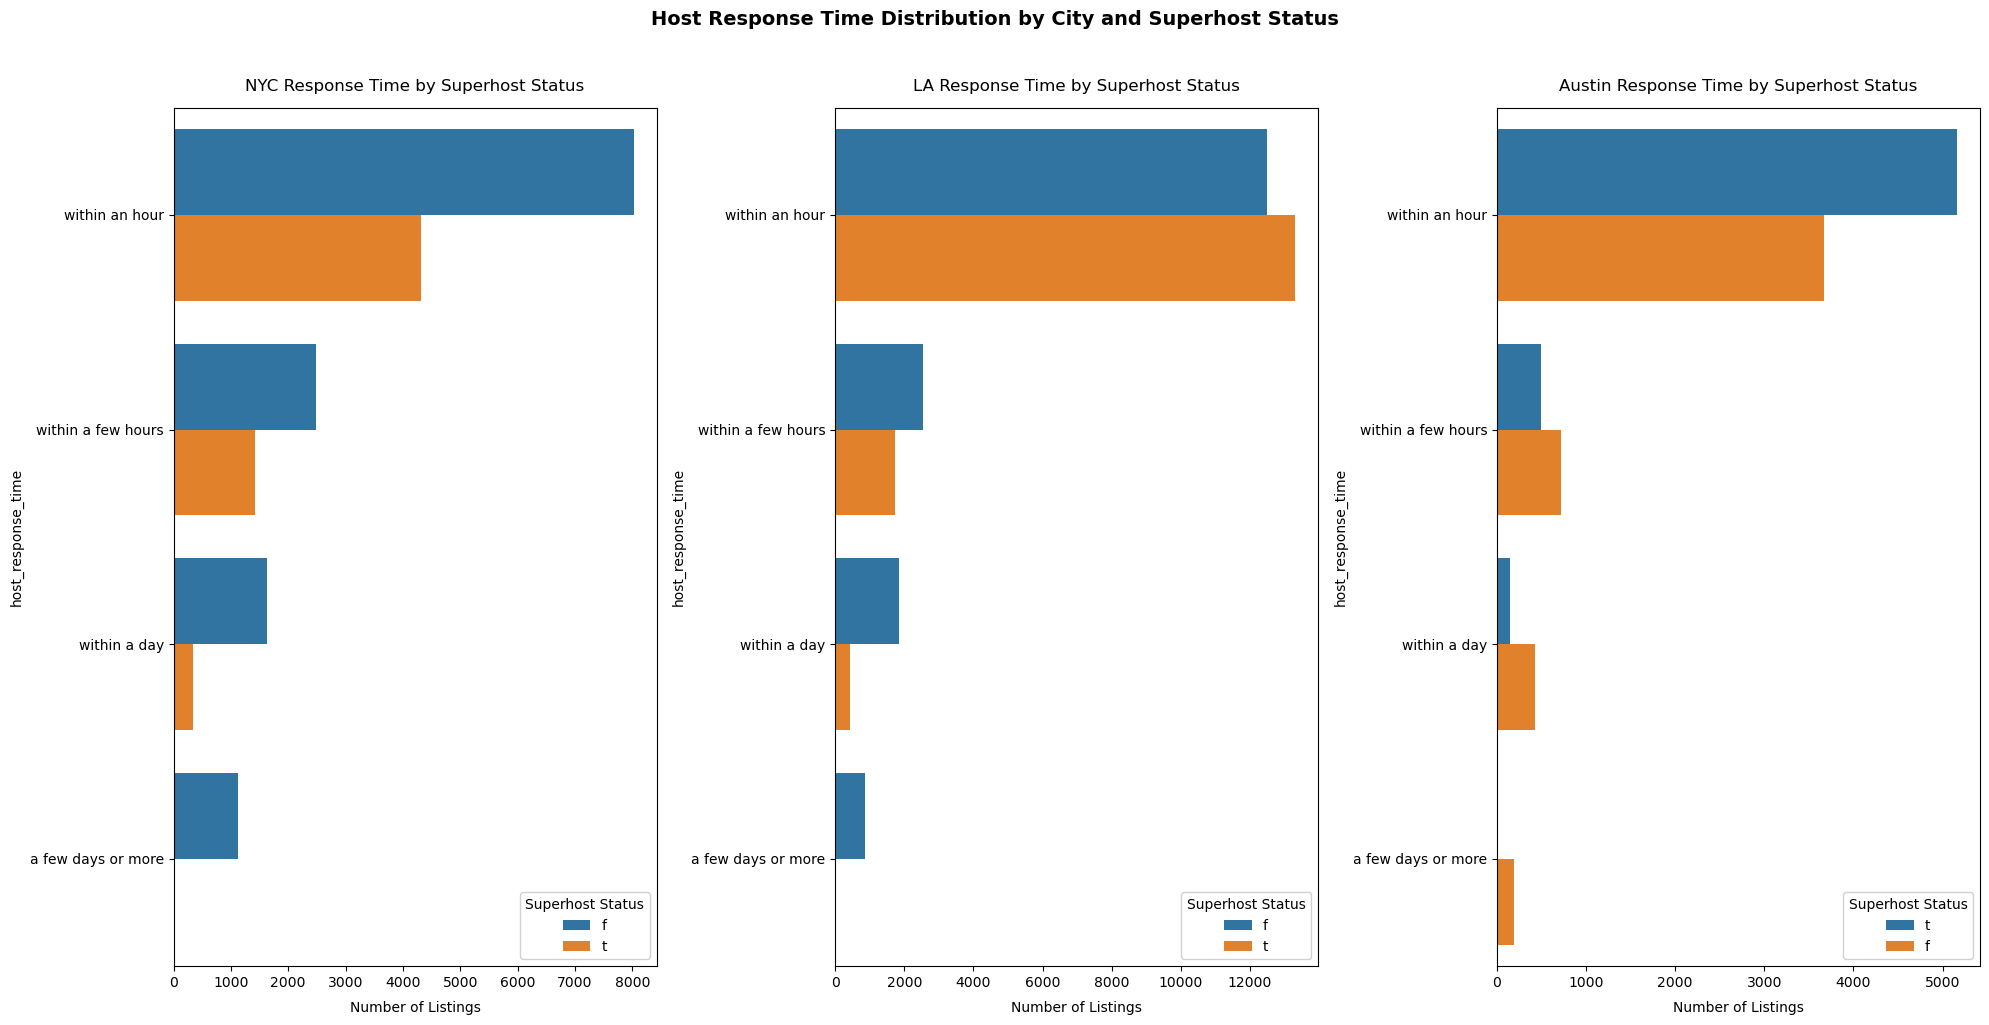

In [23]:
plt.figure(figsize=(20, 10))

time_order = ['within an hour', 'within a few hours', 'within a day', 'a few days or more']

for i, (city, data) in enumerate(zip(cities, datasets), 1):
    plt.subplot(1, 3, i)
    sns.countplot(
    y='host_response_time',
    hue='host_is_superhost',
    data=data,
    order=time_order)
    plt.legend(
        title='Superhost Status',
        loc='lower right',
        frameon=True,
        framealpha=0.9
    )
    plt.title(f'{city} Response Time by Superhost Status', pad=12)
    plt.xlabel('Number of Listings', labelpad=8)

plt.suptitle('Host Response Time Distribution by City and Superhost Status',
             y=1.02, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In all cities, the majority of hosts respond within an hour, especially among superhosts. Non-superhosts show a slightly wider spread, with more listings responding within a few hours or within a day. Superhosts consistently demonstrate faster response times, reinforcing their reliability in guest communication.

### Airbnb Response Rate vs Accetance Rate Across Cities

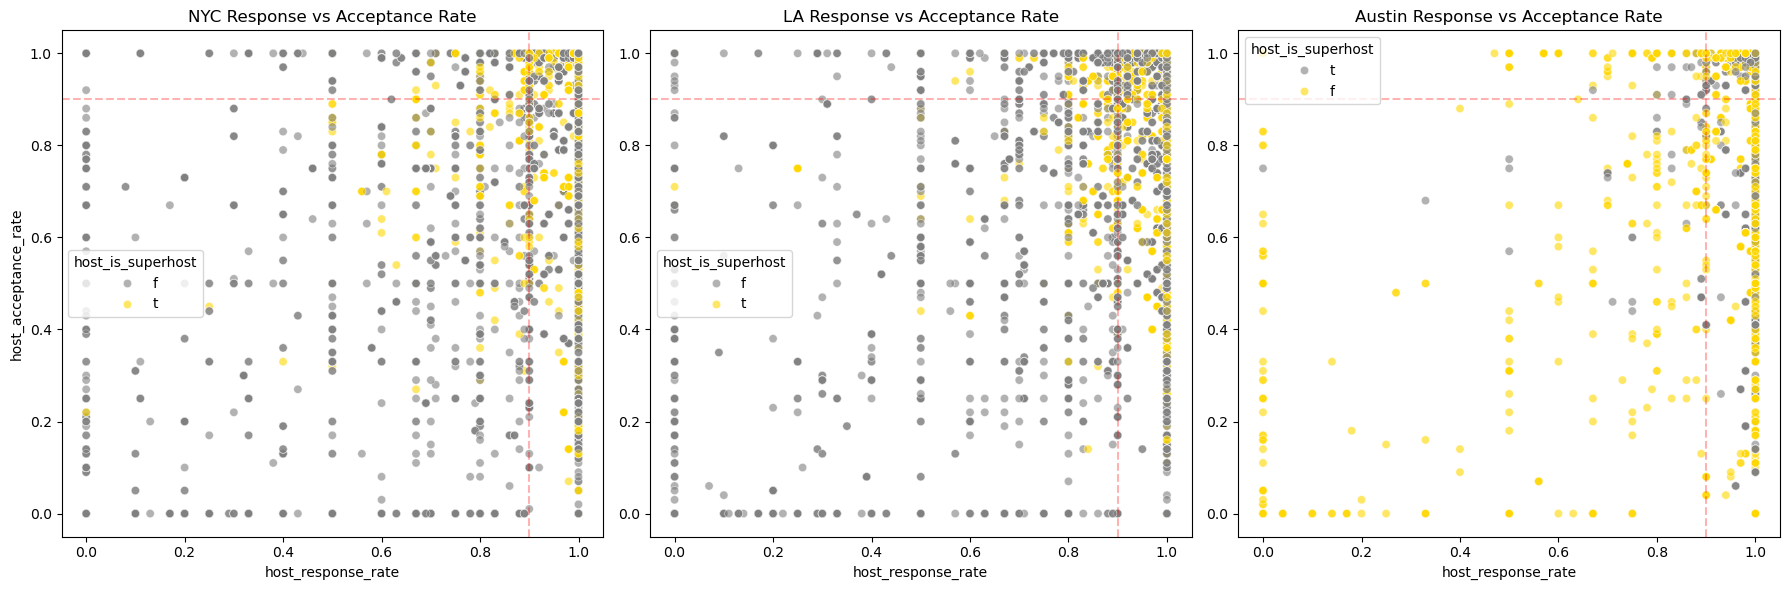

NYC Correlation Coefficient: 0.415
LA Correlation Coefficient: 0.417
Austin Correlation Coefficient: 0.469


In [24]:
# Set up the figure
plt.figure(figsize=(18, 6))

# Create scatter plots for each city
for i, (city, data) in enumerate(zip(cities, datasets), 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(
        x='host_response_rate',
        y='host_acceptance_rate',
        hue='host_is_superhost',
        data=data,
        alpha=0.6,
        palette=['gray','gold']
    )
    plt.title(f'{city} Response vs Acceptance Rate')
    plt.axvline(0.9, color='red', linestyle='--', alpha=0.3)
    plt.axhline(0.9, color='red', linestyle='--', alpha=0.3)
    if i > 1:
        plt.ylabel('')  # Only show y-label for first plot

plt.tight_layout()
plt.show()

# Print correlation coefficients
for city, data in zip(cities, datasets):
    corr = data[['host_response_rate','host_acceptance_rate']].corr().iloc[0,1]
    print(f"{city} Correlation Coefficient: {corr:.3f}")

While the data is somewhat spread out, we observe a moderate positive correlation in all cities, suggesting that hosts who respond more consistently are also more likely to accept booking requests. The calculated correlation coefficients confirm this pattern, with Austin showing the strongest relationship (r = 0.469).

### Occupancy Rates Acorss Cities, Room Types, and Property Types

C:\Users\matth\AppData\Local\Temp\ipykernel_16464\3475201838.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\matth\AppData\Local\Temp\ipykernel_16464\3475201838.py:93: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


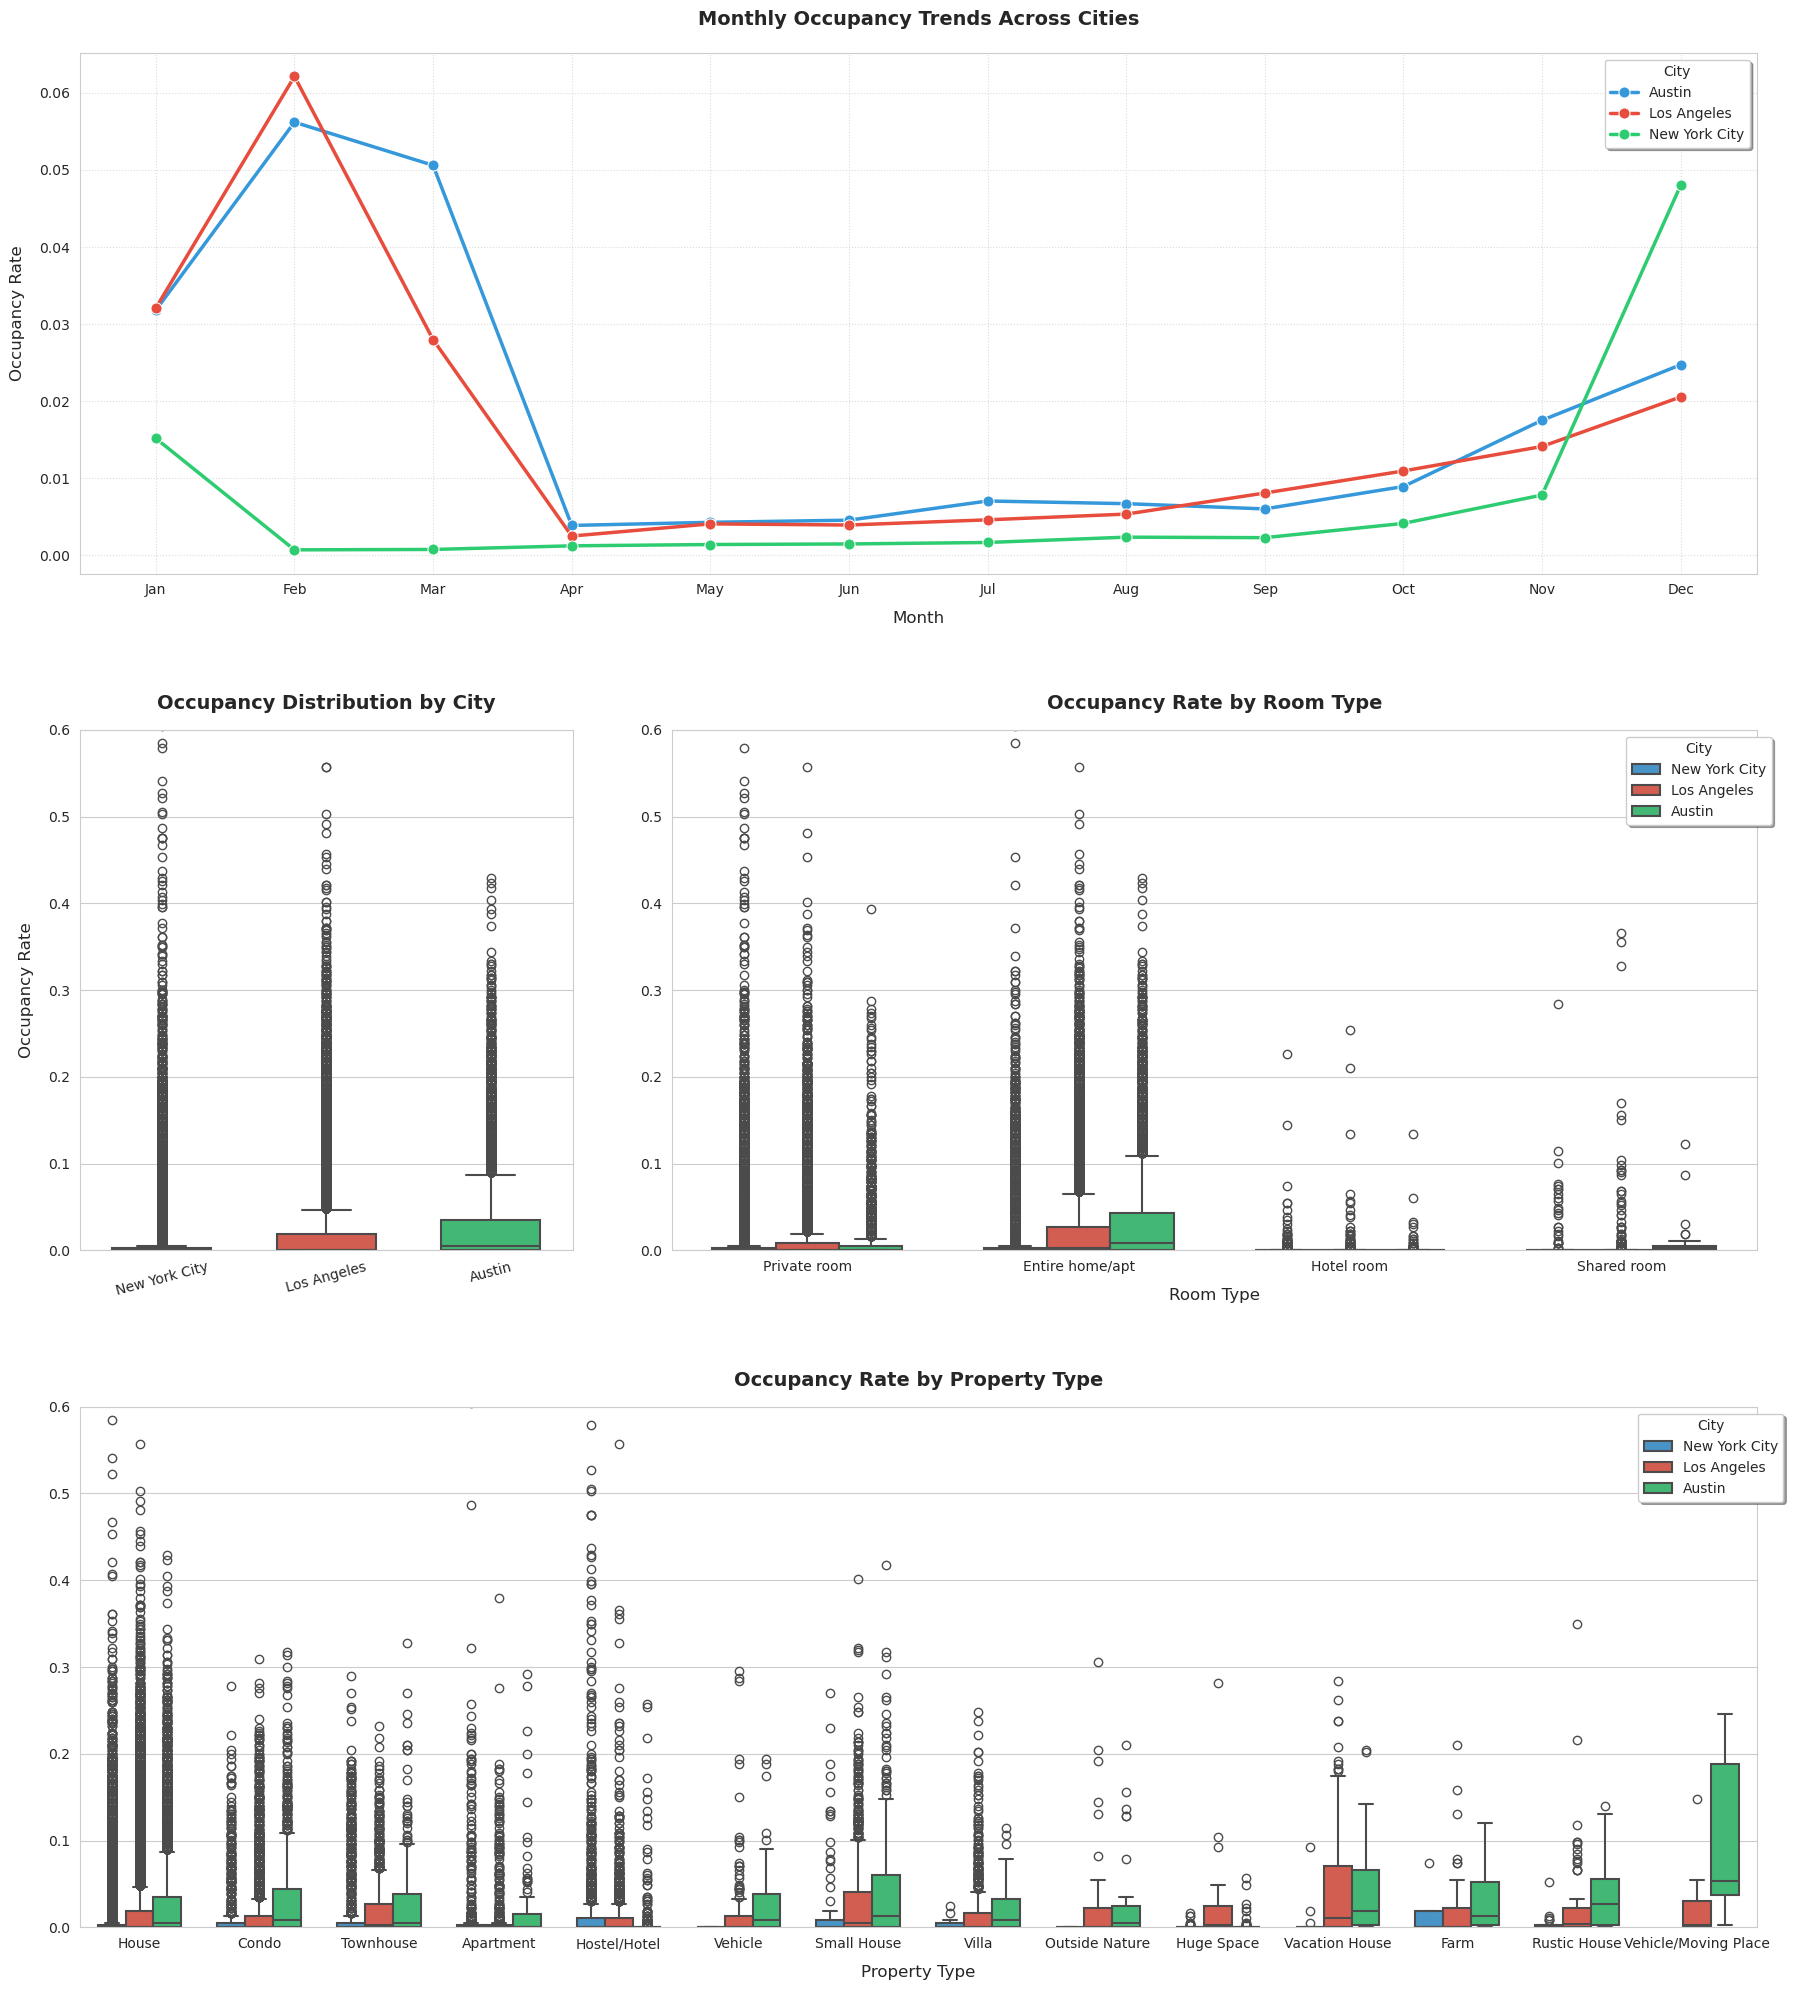

In [25]:
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Preparing data
def prepare_data(df):
    df['month'] = pd.to_datetime(df['last_review'], errors='coerce').dt.month
    return df

nyc = prepare_data(listings_NYC.copy())
la = prepare_data(listings_LA.copy())
aus = prepare_data(listing_AUS.copy())
all_listings = pd.concat([nyc, la, aus]).reset_index(drop=True)
monthly_occupancy = all_listings.groupby(['City', 'month'])['Occupancy_Rate'].mean().reset_index()

fig = plt.figure(figsize=(18, 20), constrained_layout=True)
gs = fig.add_gridspec(3, 3)

# Monthly Trends
ax1 = fig.add_subplot(gs[0, :])
sns.lineplot(
    x='month',
    y='Occupancy_Rate',
    hue='City',
    data=monthly_occupancy,
    palette=['#3498db', '#e74c3c', '#2ecc71'],
    marker='o',
    markersize=8,
    linewidth=2.5,
    ax=ax1
)
ax1.set_title('Monthly Occupancy Trends Across Cities', pad=20, fontweight='bold')
ax1.set_xlabel('Month', labelpad=10)
ax1.set_ylabel('Occupancy Rate', labelpad=10)
ax1.set_xticks(range(1,13))
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax1.grid(True, linestyle=':', alpha=0.7)
ax1.legend(title='City', frameon=True, shadow=True)

# City Distribution
ax2 = fig.add_subplot(gs[1, 0])
sns.boxplot(
    x='City',
    y='Occupancy_Rate',
    data=all_listings,
    palette=['#3498db', '#e74c3c', '#2ecc71'],
    width=0.6,
    ax=ax2,
    linewidth=1.5
)
ax2.set_title('Occupancy Distribution by City', pad=15, fontweight='bold')
ax2.set_ylabel('Occupancy Rate', labelpad=10)
ax2.set_xlabel('')
ax2.set_ylim(0,0.6)
ax2.tick_params(axis='x', rotation=15)

# Room Type
ax3 = fig.add_subplot(gs[1, 1:])
sns.boxplot(
    x='room_type',
    y='Occupancy_Rate',
    hue='City',
    data=all_listings,
    palette=['#3498db', '#e74c3c', '#2ecc71'],
    width=0.7,
    ax=ax3,
    linewidth=1.5
)
ax3.set_title('Occupancy Rate by Room Type', pad=15, fontweight='bold')
ax3.set_ylabel('')
ax3.set_ylim(0,0.6)
ax3.set_xlabel('Room Type', labelpad=10)
ax3.legend(title='City', bbox_to_anchor=(1.02, 1), frameon=True, shadow=True)

# Property Type
ax4 = fig.add_subplot(gs[2, :])
sns.boxplot(
    x='property_group_type',
    y='Occupancy_Rate',
    hue='City',
    data=all_listings,
    palette=['#3498db', '#e74c3c', '#2ecc71'],
    width=0.7,
    ax=ax4,
    linewidth=1.5
)
ax4.set_title('Occupancy Rate by Property Type', pad=15, fontweight='bold')
ax4.set_ylabel('')
ax4.set_xlabel('Property Type', labelpad=10)
ax4.set_ylim(0,0.6)
ax4.legend(title='City', bbox_to_anchor=(1.02, 1), frameon=True, shadow=True)
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.2)

plt.show()

- Both Los Angeles and New York City appear to experience higher occupancy in January and February, then see a dip in the spring months. This pattern suggests a possible seasonal boost during the winter period (e.g., holidays, New Year travel).
 
- The drop from late winter into spring, followed by gradual increases later in the year, underscores that seasonality is a critical component of occupancy trends. Hosts and investors may want to adjust pricing or marketing strategies around these seasonal patterns.

- When broken down by room and property type, listings categorized as “Entire home/apt” and more unique properties like “Vacation House” or “Rustic House” tend to have higher median occupancy rates—especially in Austin—suggesting demand may be stronger for full-property rentals or less common accommodations.